# Tests Régression et Random Forest

In [1]:
# Pandas is used for data manipulation
import pandas as pd
!pip install yfinance
import yfinance as yf

In [13]:
url="https://minio.lab.sspcloud.fr/aissac/Projet_Python_2A/sentiment_analysis_speeches_dataset.csv"

df=pd.read_csv(url,sep = ",",encoding='utf-8')
df=df.rename(columns={"date":"Date"})
df=df.drop(columns=['Unnamed: 0','title','subtitle','contents'])
df

,Date,speakers,Year,Month,Day,DayofWeek,DayofWeek_str,Month_str,afinn-score,textblob-score,LM-polarity,LM-subjectivity,FSS-index,excitement-index
0,2021-12-10,Fabio Panetta,2021,12,10,5,Friday,December,98.0,0.058202,-0.1379,0.0924,0.450,0.725
1,2021-12-08,Isabel Schnabel,2021,12,8,3,Wednesday,December,-67.0,0.074981,-0.2604,0.1302,0.878,2.173
2,2021-12-08,Luis de Guindos,2021,12,8,3,Wednesday,December,10.0,0.104165,-0.2621,0.1287,0.731,1.084
3,2021-12-08,Christine Lagarde,2021,12,8,3,Wednesday,December,-48.0,0.085205,-0.3043,0.1443,2.308,1.012
4,2021-11-29,Christine Lagarde,2021,11,29,1,Monday,November,47.0,0.118910,-0.1719,0.0831,0.979,0.941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,1997-05-13,Alexandre Lamfalussy,1997,5,13,2,Tuesday,May,107.0,0.072848,-0.0984,0.0993,0.327,0.283
2330,1997-04-30,Alexandre Lamfalussy,1997,4,30,3,Wednesday,April,118.0,0.090242,0.1111,0.0736,-0.292,0.149
2331,1997-04-22,Alexandre Lamfalussy,1997,4,22,2,Tuesday,April,95.0,0.077731,-0.0074,0.1133,0.477,0.589
2332,1997-03-10,Alexandre Lamfalussy,1997,3,10,1,Monday,March,90.0,0.089926,-0.0583,0.1481,1.150,1.538


In [14]:
daily_df=df.groupby(['Date']).mean()
daily_df

,Year,Month,Day,DayofWeek,afinn-score,textblob-score,LM-polarity,LM-subjectivity,FSS-index,excitement-index
Date,,,,,,,,,,
1997-02-07,1997.0,2.0,7.0,5.0,95.0,0.094710,-0.3544,0.1085,0.524000,0.908
1997-03-10,1997.0,3.0,10.0,1.0,90.0,0.089926,-0.0583,0.1481,1.150000,1.538
1997-04-22,1997.0,4.0,22.0,2.0,95.0,0.077731,-0.0074,0.1133,0.477000,0.589
1997-04-30,1997.0,4.0,30.0,3.0,118.0,0.090242,0.1111,0.0736,-0.292000,0.149
1997-05-13,1997.0,5.0,13.0,2.0,107.0,0.072848,-0.0984,0.0993,0.327000,0.283
...,...,...,...,...,...,...,...,...,...,...
2021-11-25,2021.0,11.0,25.0,4.0,127.0,0.110057,-0.5062,0.0723,-0.204000,0.182
2021-11-26,2021.0,11.0,26.0,5.0,73.0,0.110466,-0.4940,0.0668,0.179000,0.111
2021-11-29,2021.0,11.0,29.0,1.0,47.0,0.118910,-0.1719,0.0831,0.979000,0.941


In [52]:
estx50='^STOXX50E'
#récupération des données
data=yf.Ticker(estx50)
#récupération prix
estx50_df= data.history(periode='1d', start='1997-01-01', end='2022-01-05')

estx50_df['HML']=estx50_df['High']-estx50_df['Low'] #High minus Low
estx50_df['CMO']=estx50_df['Close']-estx50_df['Open'] #Close minus Open
estx50_df['Daily Variation']=estx50_df.apply(lambda row: 100*(row.Close - row.Open)/row.Open, axis = 1)
estx50_df['Daily Volatility']=estx50_df.apply(lambda row: 100*abs(row.CMO)/row.Open, axis = 1)
estx50_df['HML Volatility']=estx50_df.apply(lambda row: 100*abs(row.HML)/row.Open, axis = 1)

#afficher les données
estx50_df


,Open,High,Low,Close,Volume,Dividends,Stock Splits,HML,CMO,Daily Variation,Daily Volatility,HML Volatility
Date,,,,,,,,,,,,
2007-03-30,4177.669922,4207.759766,4160.350098,4181.029785,0,0,0,47.409668,3.359863,0.080424,0.080424,1.134835
2007-04-02,4177.310059,4191.759766,4163.770020,4189.549805,0,0,0,27.989746,12.239746,0.293005,0.293005,0.670042
2007-04-03,4199.540039,4248.069824,4199.540039,4246.299805,0,0,0,48.529785,46.759766,1.113450,1.113450,1.155598
2007-04-04,4252.709961,4261.830078,4242.049805,4261.830078,0,0,0,19.780273,9.120117,0.214454,0.214454,0.465122
2007-04-05,4259.979980,4274.169922,4253.790039,4271.540039,0,0,0,20.379883,11.560059,0.271364,0.271364,0.478403
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,4290.540039,4319.689941,4287.109863,4311.930176,16909200,0,0,32.580078,21.390137,0.498542,0.498542,0.759347
2021-12-29,4311.129883,4312.450195,4271.370117,4284.830078,16659800,0,0,41.080078,-26.299805,-0.610044,0.610044,0.952884
2021-12-30,4286.629883,4309.540039,4285.290039,4306.069824,18578400,0,0,24.250000,19.439941,0.453502,0.453502,0.565712


In [53]:
estx50_df=estx50_df.drop(columns=['Open','High','Low','Close','Volume','Dividends','Stock Splits'])

In [16]:
eurusd_df=yf.download('EURUSD=X')
eurusd_df['HML']=eurusd_df['High']-eurusd_df['Low'] #High minus Low
eurusd_df['CMO']=eurusd_df['Close']-eurusd_df['Open'] #Close minus Open
eurusd_df['Daily Variation']=eurusd_df.apply(lambda row: 100*(row.Close - row.Open)/row.Open, axis = 1)
eurusd_df['Daily Volatility']=eurusd_df.apply(lambda row: 100*abs(row.CMO)/row.Open, axis = 1)
eurusd_df['HML Volatility']=eurusd_df.apply(lambda row: 100*abs(row.HML)/row.Open, axis = 1)

eurusd_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,HML,CMO,Daily Variation,Daily Volatility,HML Volatility
Date,,,,,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0,0.009606,-0.006897,-0.573125,0.573125,0.798260
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0,0.016303,0.012797,1.069873,1.069873,1.362988
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0,0.005303,0.003298,0.272771,0.272771,0.438629
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0,0.010004,-0.003909,-0.322562,0.322562,0.825443
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0,0.012503,0.010892,0.901826,0.901826,1.035198
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,1.132323,1.137915,1.130506,1.132503,1.132503,0,0.007410,0.000180,0.015855,0.015855,0.654390
2022-01-03,1.137385,1.137592,1.128541,1.137346,1.137346,0,0.009051,-0.000039,-0.003406,0.003406,0.795770
2022-01-04,1.130199,1.132300,1.127345,1.130224,1.130224,0,0.004955,0.000026,0.002268,0.002268,0.438444


In [26]:
eurusd_df=eurusd_df.drop(columns=['Open','High','Low','Close','Adj Close'])

In [48]:
index_list = eurusd_df.index
print(index_list)
index_list = daily_df.index
print(index_list)

DatetimeIndex(['2003-12-01', '2003-12-02', '2003-12-03', '2003-12-04',
               '2003-12-05', '2003-12-08', '2003-12-09', '2003-12-10',
               '2003-12-11', '2003-12-12',
               ...
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06'],
              dtype='datetime64[ns]', name='Date', length=4695, freq=None)
DatetimeIndex(['1997-02-07', '1997-03-10', '1997-04-22', '1997-04-30',
               '1997-05-13', '1997-06-02', '1997-06-30', '1997-09-12',
               '1997-09-22', '1997-10-13',
               ...
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-22',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29',
               '2021-12-08', '2021-12-10'],
              dtype='datetime64[ns]', name='Date', length=1807, freq=None)


In [29]:
daily_df.index = pd.to_datetime(daily_df.index)
index_list = daily_df.index
print(index_list)

DatetimeIndex(['1997-02-07', '1997-03-10', '1997-04-22', '1997-04-30',
               '1997-05-13', '1997-06-02', '1997-06-30', '1997-09-12',
               '1997-09-22', '1997-10-13',
               ...
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-22',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29',
               '2021-12-08', '2021-12-10'],
              dtype='datetime64[ns]', name='Date', length=1807, freq=None)


In [30]:
df1=daily_df.join(eurusd_df)
df1=df1.dropna()
df1

,Year,Month,Day,DayofWeek,afinn-score,textblob-score,LM-polarity,LM-subjectivity,FSS-index,excitement-index,Volume,HML,CMO,Daily Variation,Daily Volatility,HML Volatility
Date,,,,,,,,,,,,,,,,
1997-02-07,1997.0,2.0,7.0,5.0,95.0,0.094710,-0.3544,0.1085,0.524000,0.908,NaN,NaN,NaN,NaN,NaN,NaN
1997-03-10,1997.0,3.0,10.0,1.0,90.0,0.089926,-0.0583,0.1481,1.150000,1.538,NaN,NaN,NaN,NaN,NaN,NaN
1997-04-22,1997.0,4.0,22.0,2.0,95.0,0.077731,-0.0074,0.1133,0.477000,0.589,NaN,NaN,NaN,NaN,NaN,NaN
1997-04-30,1997.0,4.0,30.0,3.0,118.0,0.090242,0.1111,0.0736,-0.292000,0.149,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-13,1997.0,5.0,13.0,2.0,107.0,0.072848,-0.0984,0.0993,0.327000,0.283,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,2021.0,11.0,25.0,4.0,127.0,0.110057,-0.5062,0.0723,-0.204000,0.182,0.0,0.002693,-0.000402,-0.035847,0.035847,0.240270
2021-11-26,2021.0,11.0,26.0,5.0,73.0,0.110466,-0.4940,0.0668,0.179000,0.111,0.0,0.011400,0.000063,0.005594,0.005594,1.017081
2021-11-29,2021.0,11.0,29.0,1.0,47.0,0.118910,-0.1719,0.0831,0.979000,0.941,0.0,0.003915,0.000204,0.018064,0.018064,0.346759


In [35]:
# To find the correlation among
# the columns using pearson method
df1.corr(method ='pearson')
#df1.corr(method ='kendall')

,Year,Month,Day,DayofWeek,afinn-score,textblob-score,LM-polarity,LM-subjectivity,FSS-index,excitement-index,Volume,HML,CMO,Daily Variation,Daily Volatility,HML Volatility
Year,1.000000,0.029655,-0.009017,-0.035783,-0.343179,-0.120323,-0.298109,-0.174473,0.036695,-0.080571,NaN,-0.077952,-0.024749,-0.025234,-0.517436,-0.076605
Month,0.029655,1.000000,-0.112873,-0.003746,-0.028685,-0.028537,-0.075184,-0.004779,0.051571,0.017946,NaN,-0.036931,0.022740,0.023287,-0.069423,-0.037393
Day,-0.009017,-0.112873,1.000000,0.009640,0.030023,0.016701,0.037797,-0.005823,-0.049618,-0.030524,NaN,0.003614,0.010062,0.009530,0.041481,0.003910
DayofWeek,-0.035783,-0.003746,0.009640,1.000000,-0.040540,-0.022036,-0.026516,0.056641,0.073256,0.032973,NaN,-0.025867,0.034587,0.037381,0.032820,-0.023213
afinn-score,-0.343179,-0.028685,0.030023,-0.040540,1.000000,0.159020,0.497417,-0.188644,-0.404905,-0.164827,NaN,0.006319,0.031134,0.029433,0.185758,0.006366
textblob-score,-0.120323,-0.028537,0.016701,-0.022036,0.159020,1.000000,0.168336,-0.213992,-0.373184,-0.263459,NaN,-0.016636,0.020530,0.020183,0.030154,-0.017666
LM-polarity,-0.298109,-0.075184,0.037797,-0.026516,0.497417,0.168336,1.000000,-0.136884,-0.633131,-0.325968,NaN,0.021364,0.035610,0.037569,0.172911,0.020777
LM-subjectivity,-0.174473,-0.004779,-0.005823,0.056641,-0.188644,-0.213992,-0.136884,1.000000,0.411051,0.521615,NaN,0.048861,-0.000606,-0.001367,0.097292,0.050116
FSS-index,0.036695,0.051571,-0.049618,0.073256,-0.404905,-0.373184,-0.633131,0.411051,1.000000,0.508019,NaN,0.011622,-0.016613,-0.016282,-0.002344,0.012380
excitement-index,-0.080571,0.017946,-0.030524,0.032973,-0.164827,-0.263459,-0.325968,0.521615,0.508019,1.000000,NaN,0.014179,0.012857,0.012759,0.066359,0.016413


In [36]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


In [74]:
x = df1['FSS-index'].values.reshape(-1, 1)
y = df2['Daily Variation'].values.reshape(-1, 1)

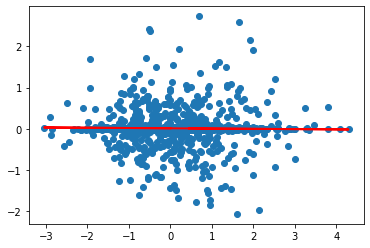

In [75]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y)
plt.plot(x, regr.predict(x), color='red', linewidth=2)

plt.show()

In [76]:

df2=daily_df.join(estx50_df)
df2=df1.dropna()
df2

,Year,Month,Day,DayofWeek,afinn-score,textblob-score,LM-polarity,LM-subjectivity,FSS-index,excitement-index,Volume,HML,CMO,Daily Variation,Daily Volatility,HML Volatility
Date,,,,,,,,,,,,,,,,
2003-12-01,2003.0,12.0,1.0,1.0,138.0,0.074949,0.0200,0.1009,0.000000,0.731,0.0,0.009606,-0.006897,-0.573125,0.573125,0.798260
2003-12-03,2003.0,12.0,3.0,3.0,144.0,0.131415,0.4030,0.1056,-0.759000,0.228,0.0,0.005303,0.003298,0.272771,0.272771,0.438629
2003-12-10,2003.0,12.0,10.0,3.0,69.0,0.105858,0.5833,0.0541,-0.743000,0.030,0.0,0.010398,-0.005809,-0.474227,0.474227,0.848865
2004-01-15,2004.0,1.0,15.0,4.0,80.0,0.126981,0.3514,0.0649,-0.383000,0.083,0.0,0.010209,-0.005502,-0.434734,0.434734,0.806632
2004-01-16,2004.0,1.0,16.0,5.0,113.0,0.140738,0.3333,0.0503,-0.761000,0.086,0.0,0.024603,-0.020199,-1.603070,1.603070,1.952580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,2021.0,11.0,25.0,4.0,127.0,0.110057,-0.5062,0.0723,-0.204000,0.182,0.0,0.002693,-0.000402,-0.035847,0.035847,0.240270
2021-11-26,2021.0,11.0,26.0,5.0,73.0,0.110466,-0.4940,0.0668,0.179000,0.111,0.0,0.011400,0.000063,0.005594,0.005594,1.017081
2021-11-29,2021.0,11.0,29.0,1.0,47.0,0.118910,-0.1719,0.0831,0.979000,0.941,0.0,0.003915,0.000204,0.018064,0.018064,0.346759


In [58]:
df2.corr(method ='pearson')

,Year,Month,Day,DayofWeek,afinn-score,textblob-score,LM-polarity,LM-subjectivity,FSS-index,excitement-index,Volume,HML,CMO,Daily Variation,Daily Volatility,HML Volatility
Year,1.000000,0.029655,-0.009017,-0.035783,-0.343179,-0.120323,-0.298109,-0.174473,0.036695,-0.080571,NaN,-0.077952,-0.024749,-0.025234,-0.517436,-0.076605
Month,0.029655,1.000000,-0.112873,-0.003746,-0.028685,-0.028537,-0.075184,-0.004779,0.051571,0.017946,NaN,-0.036931,0.022740,0.023287,-0.069423,-0.037393
Day,-0.009017,-0.112873,1.000000,0.009640,0.030023,0.016701,0.037797,-0.005823,-0.049618,-0.030524,NaN,0.003614,0.010062,0.009530,0.041481,0.003910
DayofWeek,-0.035783,-0.003746,0.009640,1.000000,-0.040540,-0.022036,-0.026516,0.056641,0.073256,0.032973,NaN,-0.025867,0.034587,0.037381,0.032820,-0.023213
afinn-score,-0.343179,-0.028685,0.030023,-0.040540,1.000000,0.159020,0.497417,-0.188644,-0.404905,-0.164827,NaN,0.006319,0.031134,0.029433,0.185758,0.006366
textblob-score,-0.120323,-0.028537,0.016701,-0.022036,0.159020,1.000000,0.168336,-0.213992,-0.373184,-0.263459,NaN,-0.016636,0.020530,0.020183,0.030154,-0.017666
LM-polarity,-0.298109,-0.075184,0.037797,-0.026516,0.497417,0.168336,1.000000,-0.136884,-0.633131,-0.325968,NaN,0.021364,0.035610,0.037569,0.172911,0.020777
LM-subjectivity,-0.174473,-0.004779,-0.005823,0.056641,-0.188644,-0.213992,-0.136884,1.000000,0.411051,0.521615,NaN,0.048861,-0.000606,-0.001367,0.097292,0.050116
FSS-index,0.036695,0.051571,-0.049618,0.073256,-0.404905,-0.373184,-0.633131,0.411051,1.000000,0.508019,NaN,0.011622,-0.016613,-0.016282,-0.002344,0.012380
excitement-index,-0.080571,0.017946,-0.030524,0.032973,-0.164827,-0.263459,-0.325968,0.521615,0.508019,1.000000,NaN,0.014179,0.012857,0.012759,0.066359,0.016413


In [77]:
import numpy as np
import matplotlib.pyplot as plt
  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [78]:
x = x.reshape(-1,1)
regression_model = LinearRegression()
  
# Fit the data(train the model)
regression_model.fit(x, y)
  
# Predict
y_predicted = regression_model.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
  
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00658713]]
Intercept: [0.011352]
MSE: 0.15973581464975994
Root mean squared error:  0.3996696318833343
R2 score:  0.00026509017087328335


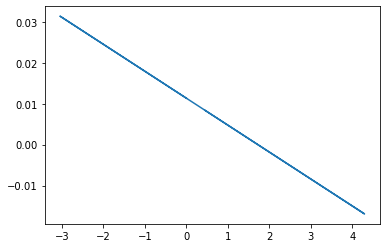

In [79]:
plt.plot(x,y_predicted)

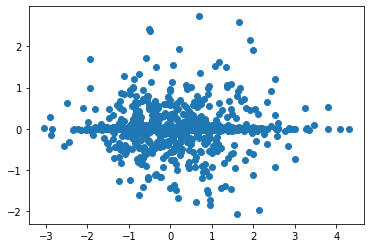

In [80]:
plt.scatter(x,y)

## Random Forest

In [201]:

df=daily_df.join(eurusd_df["Daily Variation"]) #.apply(np.sign) pour les Classifier
df=df.dropna()
features=df
#features = pd.get_dummies(features) ???
features

,Year,Month,Day,DayofWeek,afinn-score,textblob-score,LM-polarity,LM-subjectivity,FSS-index,excitement-index,Daily Variation
Date,,,,,,,,,,,
2003-12-01,2003.0,12.0,1.0,1.0,138.0,0.074949,0.0200,0.1009,0.000000,0.731,-0.573125
2003-12-03,2003.0,12.0,3.0,3.0,144.0,0.131415,0.4030,0.1056,-0.759000,0.228,0.272771
2003-12-10,2003.0,12.0,10.0,3.0,69.0,0.105858,0.5833,0.0541,-0.743000,0.030,-0.474227
2004-01-15,2004.0,1.0,15.0,4.0,80.0,0.126981,0.3514,0.0649,-0.383000,0.083,-0.434734
2004-01-16,2004.0,1.0,16.0,5.0,113.0,0.140738,0.3333,0.0503,-0.761000,0.086,-1.603070
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,2021.0,11.0,25.0,4.0,127.0,0.110057,-0.5062,0.0723,-0.204000,0.182,-0.035847
2021-11-26,2021.0,11.0,26.0,5.0,73.0,0.110466,-0.4940,0.0668,0.179000,0.111,0.005594
2021-11-29,2021.0,11.0,29.0,1.0,47.0,0.118910,-0.1719,0.0831,0.979000,0.941,0.018064


In [202]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['Daily Variation'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Daily Variation', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [203]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 1)

In [208]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=1)

In [209]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.16


In [210]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


/tmp/ipykernel_17102/47680729.py:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / test_labels)


In [207]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predictions)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [211]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Year                 Importance: 0.13
Variable: afinn-score          Importance: 0.12
Variable: textblob-score       Importance: 0.12
Variable: LM-polarity          Importance: 0.11
Variable: FSS-index            Importance: 0.11
Variable: LM-subjectivity      Importance: 0.1
Variable: excitement-index     Importance: 0.1
Variable: Month                Importance: 0.09
Variable: Day                  Importance: 0.09
Variable: DayofWeek            Importance: 0.04


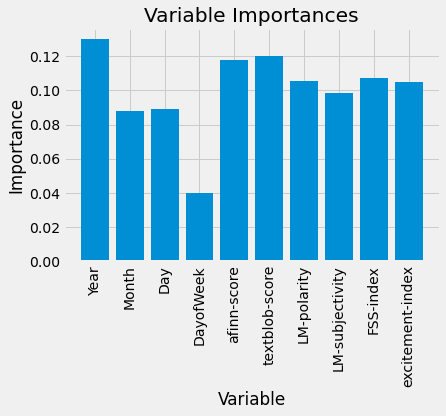

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [195]:
true_data = df["Daily Variation"]

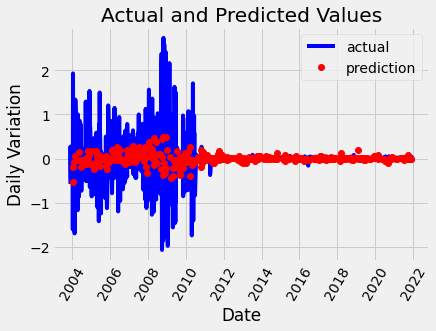

In [213]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('Month')]
days = features[:, feature_list.index('Day')]
years = features[:, feature_list.index('Year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
years = test_features[:, feature_list.index('Year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Daily Variation'); plt.title('Actual and Predicted Values');

In [197]:
true_data.date = pd.to_datetime(true_data.date)
true_data.join(predictions_data, on='date')

ValueError: You are trying to merge on datetime64[ns] and int64 columns. If you wish to proceed you should use pd.concat

In [198]:
# true_data.index = true_data["date"].apply(pd.to_datetime)
# predictions_data.index = predictions_data["date"].apply(pd.to_datetime)
# true_data = true_data['actual']
# predictions_data = predictions_data['prediction']
df=pd.concat([true_data,predictions_data],axis = 1, join = 'inner')
df

,date,actual,date,prediction
0,2003-12-01,-1.0,2016-11-09,1.0
1,2003-12-03,1.0,2016-11-14,-1.0
2,2003-12-10,-1.0,2017-07-25,1.0
3,2004-01-15,-1.0,2017-09-22,1.0
4,2004-01-16,-1.0,2004-11-12,1.0
...,...,...,...,...
409,2009-09-21,-1.0,2008-09-26,-1.0
410,2009-09-24,-1.0,2013-10-03,-1.0
411,2009-09-25,0.0,2019-05-23,1.0
412,2009-09-28,-1.0,2011-06-07,1.0


In [199]:
df['OK']= df['actual']==df['prediction']
df['OK'].sum()

215

In [200]:
166/348

0.47701149425287354

In [158]:
index_list = true_data.date
print(index_list)
index_list = predictions_data.date
print(index_list)

0      2007-04-13
1      2007-04-16
2      2007-04-17
3      2007-04-18
4      2007-04-19
          ...    
1154   2021-11-25
1155   2021-11-26
1156   2021-11-29
1157   2021-12-08
1158   2021-12-10
Name: date, Length: 1159, dtype: datetime64[ns]
0     2017-06-28
1     2009-10-09
2     2019-02-27
3     2016-10-25
4     2012-11-07
         ...    
343   2012-04-17
344   2008-10-22
345   2019-11-26
346   2012-12-06
347   2016-11-24
Name: date, Length: 348, dtype: datetime64[ns]
